In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mp

<h1>Analyse de la base de données de restomontreal.ca</h1>

In [2]:
pd.set_option("display.float_format", lambda x : "%.2f" % x)

Bonjour à vous qui lisez cette page !

Nous allons y analyser un petit csv que j'ai créé, qui comprend 6151 restaurants répertoriés sur restomontreal.ca, et quelques unes de leur caractéristiques.

Vous êtes prêts ? On y va !

In [3]:
restos=pd.read_csv("okrestos.csv")

In [4]:
restos.dtypes

nom                 object
adresse             object
arrondissement      object
arrondissement2     object
telephone           object
prix               float64
cuisine1            object
cuisine2            object
cuisine3            object
cuisine4            object
cuisine5            object
cuisine6            object
cuisine7            object
dtype: object

In [5]:
restos.shape

(6151, 13)

Avant d'aller plus loin, une petite explication sur le système de gammes de prix s'impose.
Dans restosmontreal.ca, les restaurants étaient classés entre \$ (de 0 à 20\$) , \$\$(de 20 à 30\$), \$\$\$(de 30 à 45\$) et \$\$\$\$ (plus de 45\$).
Je voulais calculer des moyennes de prix, et ce système n'était pas pratique. J'ai donc attribué les valeurs 1 à \$, 2 à \$\$, 3 à \$\$\$, 4 à \$\$\$\$, et d'autres valeurs par demi-points lorsque je rencontrais des intervalles d'intervalles (1.5 pour \$,\$\$ ou 3.5 pour \$\$\$,\$\$\$\$).

<h2>Où sont ces restaurants ?</h2>

Maintenant, on s'intéresse à la répartition des restaurants selon les endroits (quartiers, arrondissements de Montréal ou villes).

In [9]:
restos.arrondissement.value_counts()

Centre-ville                 520
Le Plateau-Mont-Royal        473
Vieux-Montréal               242
Villeray-Saint-Michel        196
Côte-des-Neiges              183
Rosemont-Petite-Patrie       177
Verdun/Lasalle               175
Chomedey                     162
Ahuntsic-Cartierville        158
Mile-End                     139
Anjou-St-Léonard             133
Le Village/Centre Sud        118
Ville Saint-Laurent          115
Hochelaga-Maisonneuve        105
Brossard                      97
Terrebonne/Lachenaie          94
Longueuil                     94
Notre-Dame-de-Grâce (NDG)     83
Sherbrooke                    80
Petite-Italie                 77
Quartier Latin                68
Dollard-des-Ormeaux           66
Mont-Tremblant                63
Saint-Hubert                  62
Saint-Henri                   56
Westmount                     54
St-Jean-Sur-Richelieu         54
Pointe-Claire                 54
Repentigny                    53
Saint-Jérôme                  51
          

In [25]:
restos.arrondissement2.value_counts()

Montréal-Est                  185
Rosemont-Petite-Patrie        136
Le Plateau-Mont-Royal         121
Longueuil                     107
Rue St-Denis                  106
Le Sud Ouest                  100
Centre-ville                   96
Boul. St-Laurent/Main          78
Quartier des Spectacles        76
Notre-Dame-de-Grâce (NDG)      65
Vieux Longueuil                53
Villeray-Saint-Michel          46
Mile-End                       46
Outremont                      37
Laval-des-Rapides              35
Brossard                       34
Chomedey                       31
Parc-Extension                 22
Avenue Duluth                  18
Petite-Italie                  17
Côte-des-Neiges                17
Laval-Ouest                    15
Hochelaga-Maisonneuve          14
Westmount                      13
Auteuil                        12
Verdun/Lasalle                 11
Le Village/Centre Sud          11
Quartier Dix30                 10
Ahuntsic-Cartierville          10
Petite-Bourgog

On voit que la majorité des restaurants se trouvent dans le Centre-ville de Montréal et aux alentours (Plateau Mont-Royal et Vieux-Montréal).
Les quartiers très résidentiels, comme Villeray-Saint-Michel ou Rosemont-Petite-Patrie, ne sont pas en reste pour le nombre de restaurants.

<h2>Les restaurants les plus chers</h2>

On veut savoir combien restosmontreal.ca répertorie de restaurants dans la grande région de Montréal  qui ont des repas à plus de 45$ par personne, sans compter l'alcool ni le pourboire.

In [24]:
chers=restos.prix == 4
chers
chers.value_counts()

False    6136
True       15
Name: prix, dtype: int64

Seulement 15 ! Et où se trouvent-ils ?

In [28]:
restos[chers].arrondissement.value_counts()

Vieux-Montréal           4
Centre-ville             3
Boul. St-Laurent/Main    2
Mile-End                 2
Mont-Tremblant           2
Griffintown              1
Bromont                  1
Name: arrondissement, dtype: int64

In [29]:
restos[chers].arrondissement2.value_counts()

Outremont                2
Le Plateau-Mont-Royal    2
Le Sud Ouest             1
Name: arrondissement2, dtype: int64

Sans énormément de surprise, on trouve plus de la moitié des restaurants chers dans le Vieux-Montréal, en Centre-ville et à Outremont.
Mais on voit que la gentrification a fait son petit bonhomme de chemin, et on trouve désormais un restaurants cher dans Le Sud Ouest, deux autres dans le Mile-End et deux au Plateau Mont-Royal..

Et en majorité, les restaurants ont quel prix dans le grand Montréal ?

In [33]:
restos.prix.value_counts()/ len(restos.prix) *100

1.00   57.03
2.00   18.34
1.50   13.48
2.50    6.99
3.00    2.37
3.50    0.86
4.00    0.24
Name: prix, dtype: float64

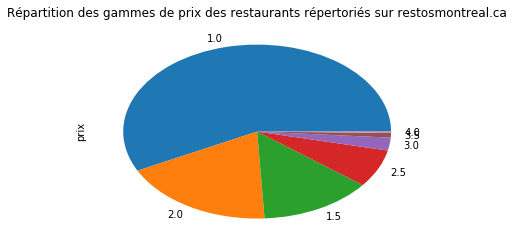

In [35]:
restos.prix.value_counts().plot(kind="pie", title="Répartition des gammes de prix des restaurants répertoriés sur restosmontreal.ca")

On voit qu'un repas au restaurant dans le Grand Montréal coûte, dans la majorité des établissements, entre 0 et 20\$ par personne (sans alcool ni pourboire).
On peut donc facilement trouver des restaurants peu chers dans la grande région de Montréal selon restomontreal.ca .

<h2>Des restaurants typiques du coin ?</h2>

En vivant à Montréal, je me suis souvent dit qu'il n'y a pas beaucoup de restaurants typiquement québécois ou même canadien. Est-ce vrai ? Maintenant, on peut le vérifier :
Malheureusement, restomontreal.ca n'a que la catégorie de cuisine "Canadienne" pour me permettre de le savoir, et même pas de catégorie Québécoise.

In [45]:
ca1= restos.cuisine1 == "Canadienne"
ca2= restos.cuisine2 == "Canadienne"
ca3= restos.cuisine3 == "Canadienne"
ca4= restos.cuisine4 == "Canadienne"
ca5= restos.cuisine5 == "Canadienne"
ca6= restos.cuisine6 == "Canadienne"
ca7= restos.cuisine7 == "Canadienne"

In [57]:
ca1.value_counts()

False    6113
True       38
Name: cuisine1, dtype: int64

In [51]:
ca2.value_counts()

False    6117
True       34
Name: cuisine2, dtype: int64

In [52]:
ca3.value_counts()

False    6141
True       10
Name: cuisine3, dtype: int64

In [53]:
ca4.value_counts()

False    6146
True        5
Name: cuisine4, dtype: int64

In [54]:
ca5.value_counts()

False    6151
Name: cuisine5, dtype: int64

In [55]:
ca6.value_counts()

False    6140
True       11
Name: cuisine6, dtype: int64

In [56]:
ca7.value_counts()

False    6151
Name: cuisine7, dtype: int64

In [61]:
ca=38+34+10+5+11
ca

98

Dans le Grand Montréal, selon la classification des cuisines de restomontreal.ca, il n'y a que 98 restaurants qui proposent une cuisine typiquement canadienne ! Cela ne fait que ...

In [63]:
pourca=ca/int(len(restos))
pourca*100

1.5932368720533248

... que 1.6% des restaurants de cette région qui proposent une cuisine canadienne. 


*(avis personnel on)* C'est dommage, quand on sait à quel point ces plats sont bons ! *(avis personnel off)*